Voi utiliza un set de aproximativ 50 de imagini pentru antrenament si 100 pt validare, din dataset-ul nostru





In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_dir='/content/drive/My Drive/filtered/train'
validation_dir='/content/drive/My Drive/filtered/validation'

In [0]:
train_affected_dir=os.path.join(train_dir,'affected')
train_unaffected_dir=os.path.join(train_dir,'unaffected')
validation_affected_dir=os.path.join(validation_dir,'affected')
validation_unaffected_dir=os.path.join(validation_dir,'unaffected')

In [0]:
batch_size = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
num_affected_tr=len(os.listdir(train_affected_dir))
num_unaffected_tr=len(os.listdir(train_unaffected_dir))
num_affected_val=len(os.listdir(validation_affected_dir))
num_unaffected_val=len(os.listdir(validation_unaffected_dir))
total_train=num_affected_tr+num_unaffected_tr
total_val=num_affected_val+num_unaffected_val

In [28]:
print ('numarul de plamani afectati pt training',num_affected_tr)
print ('numarul de plamani afectati pt validare',num_affected_val)

numarul de plamani afectati pt training 21
numarul de plamani afectati pt validare 49


In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [64]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 70 images belonging to 2 classes.


Aplic diferite modalitati pentru reducerea overfittingului(pentru a imbunatati acuratetea modelului)


**Horizontal Flip**

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [41]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=validation_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 70 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
plotImages(sample_training_images[:5])

**Rotatii**

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [46]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 42 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
plotImages(sample_training_images[:5])

**Augumentare zoom**

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [49]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 42 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

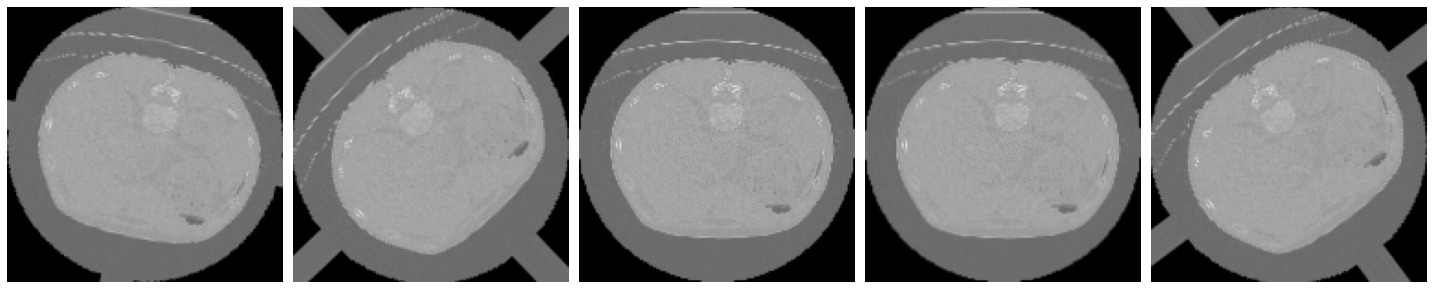

In [51]:
plotImages(augmented_images)

**Aplicarea tuturor in acelasi timp**

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2
                    )

In [57]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 42 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Tehnica Dropout**
E o forma de regularizare utila pe un dataset nu foarte mare



In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [0]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)